# Main notebook with demos

This notebook contains a demo of the different aspects of the project

## Importing modules

In [1]:
from src.wildfire_plots import extract_wildfire_data, plot_size_hist, plot_increasing_trend, plot_fire_map

## Wildfire Visualization: Histogram

The wildfire dataset is extracted from the given path

In [2]:
wildfire_path = 'Datasets/FPA_FOD_20170508.sqlite'

In [3]:
fire_data = extract_wildfire_data(wildfire_path)

The following plots the histogram for the data

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


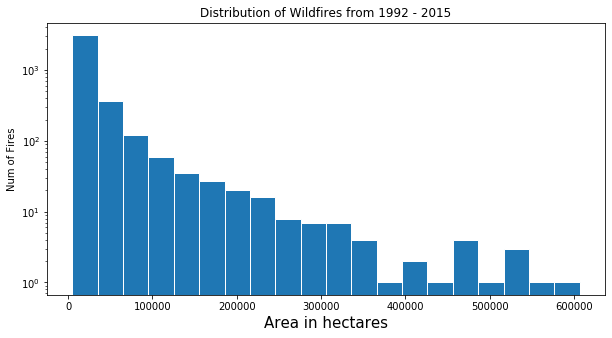

In [4]:
fd_hist = plot_size_hist(fire_data)

The following shows the distribution of all sizes from 5000 hectares all the way to over 600000 hectares.

#### Plot the increasing trend

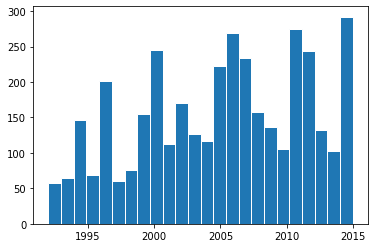

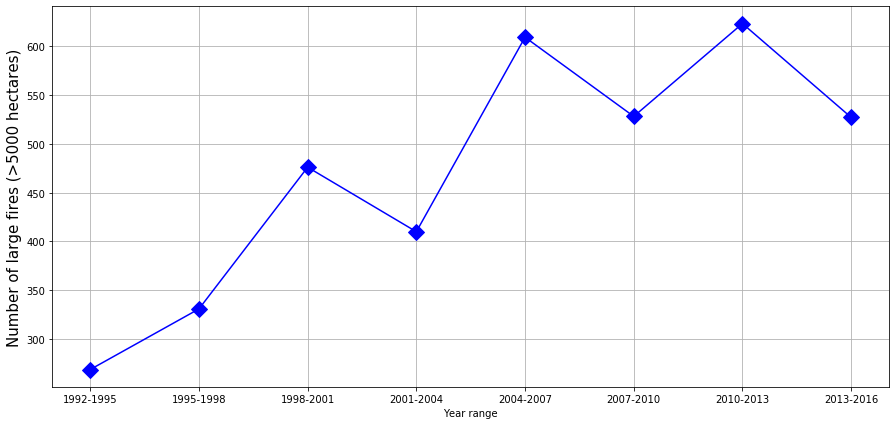

In [5]:
fd_inc = plot_increasing_trend(fire_data)

The plots above show the increasing trend of the wildfires over the different years

### Wildfire visulaization: Geographic map

/Volumes/GoogleDrive/My Drive/UCSD Acads/Year 3/Quarter 2/Programming for DS/Project/ECE143_Project/src/wildfire_plots.py:100: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  llcrnrlon=-170,urcrnrlon=-65,)
/Volumes/GoogleDrive/My Drive/UCSD Acads/Year 3/Quarter 2/Programming for DS/Project/ECE143_Project/src/wildfire_plots.py:104: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  map.drawcountries(linewidth=0.85,color='black',zorder=3)
/Volumes/GoogleDrive/My Drive/UCSD Acads/Year 3/Quarter 2/Programming for DS/Project/ECE143_Project/src/wildfire_plots.py:105: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  map.drawstates(linewidth=0.15,zorder=3)


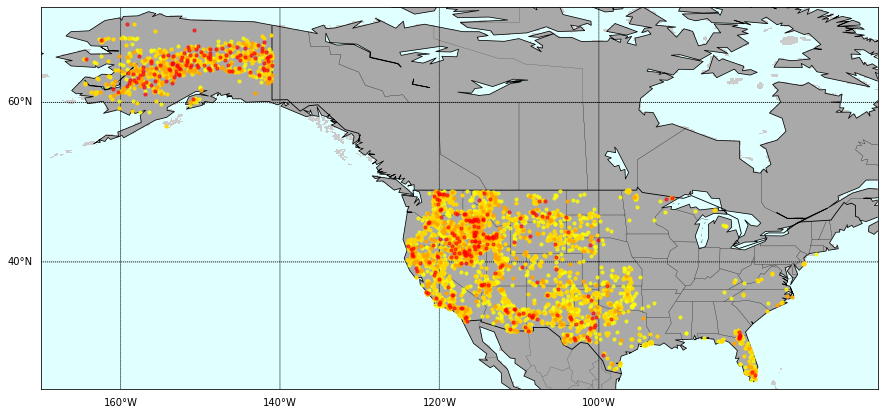

In [6]:
fd_map = plot_fire_map(fire_data)

The above plot shows the distribution of the wildfires geographically over the given area of United States. As the color intensity moves from yellow to red, the size of the fires also keep increasing. 

# Ploting correlation

### Import modules

In [1]:
import src.correlation_plots as correlation

### Fire / Gas Emission Correlation

In [2]:
fire_data = './Datasets/FPA_FOD_20170508.sqlite'
gas_data = './Datasets/greenhouse_gas_inventory_data_data.csv'

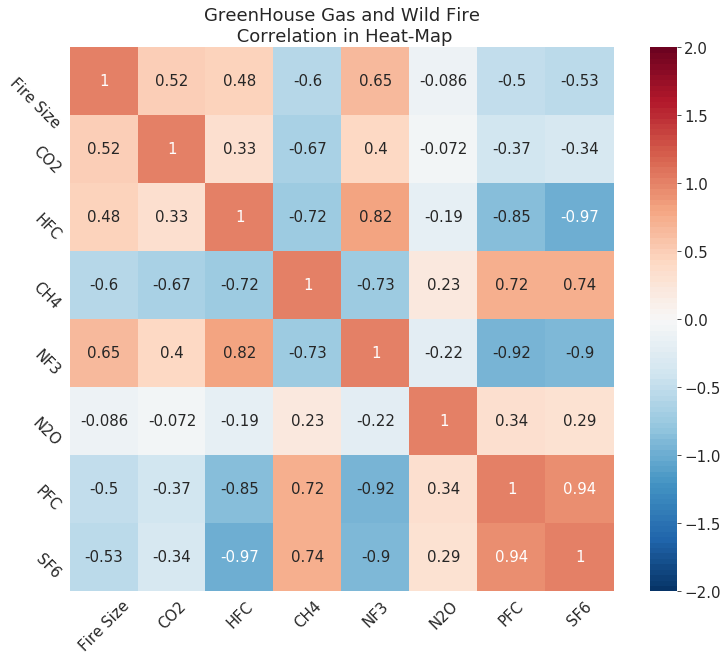

In [3]:
df = correlation.extract_fire_gas(fire_data, gas_data)
correlation.fire_gas_heatmap(df)

### Fire / Weather Correlation

In [10]:
fire_data = './Datasets/FPA_FOD_20170508.sqlite'
# use state='AK' for only Alaska, then you can choose whatever n because we are choosing all AK samples
#df = correlation.extract_fire_sample(fire_data, n=1, state='AK')
# use state='ALL' for all US, then you should choose n(like 500 in our PRE) as number of samples
df = correlation.extract_fire_sample(fire_data, n=100, state='ALL')

df.head()

,LATITUDE,LONGITUDE,STATE,date,fire_class
1045773,35.700000,-81.800000,NC,2001-05-12 00:00:00,1
1373890,48.575430,-116.408904,ID,2009-08-02 00:00:00,1
1609262,31.270227,-82.003802,GA,2012-04-04 00:00:00,1
1646139,45.287500,-107.457600,MT,2013-07-17 00:00:00,1
1825777,41.780796,-70.743341,MA,2015-05-14 00:00:00,1


In [11]:
wind_air_data = './Datasets/adaptor.mars.internal.nc'
df = correlation.extract_wind_air(df, wind_air_data)

rain_data = './Datasets/precip.mon.mean.nc'
df = correlation.extract_rain(df, rain_data)

temp_data = './Datasets/air.mon.mean.nc'
df = correlation.extract_temp(df, temp_data)

df.head()

Extracting wind/air on: 0/700
Extracting wind/air on: 140/700
Extracting wind/air on: 280/700
Extracting wind/air on: 420/700
Extracting wind/air on: 560/700
Extracting rain on: 0/700
Extracting rain on: 140/700
Extracting rain on: 280/700
Extracting rain on: 420/700
Extracting rain on: 560/700
Extracting temperature on: 0/700
Extracting temperature on: 140/700
Extracting temperature on: 280/700
Extracting temperature on: 420/700
Extracting temperature on: 560/700


,LATITUDE,LONGITUDE,STATE,date,fire_class,wind,air_pressure,rain,temperature
1045773,35.700000,-81.800000,NC,2001-05-12 00:00:00,1,96781.175991,1.929222,3.47,18.280651
1373890,48.575430,-116.408904,ID,2009-08-02 00:00:00,1,90147.963793,1.901801,1.17,19.234198
1609262,31.270227,-82.003802,GA,2012-04-04 00:00:00,1,101261.420264,2.864341,0.92,18.366343
1646139,45.287500,-107.457600,MT,2013-07-17 00:00:00,1,88458.380148,2.207795,0.66,21.421936
1825777,41.780796,-70.743341,MA,2015-05-14 00:00:00,1,101787.797191,4.006363,1.07,12.089515


In [ ]:
df = correlation.change_col_name(df, fire_data)

In [14]:
df.head()

,Latitude,Longitude,Fire Class,Fire Size,Wind,Air Pressure,Rain,Temperature
1045773,35.700000,-81.800000,1,0.10,96781.175991,1.929222,3.47,18.280651
1373890,48.575430,-116.408904,1,0.10,90147.963793,1.901801,1.17,19.234198
1609262,31.270227,-82.003802,1,0.10,101261.420264,2.864341,0.92,18.366343
1646139,45.287500,-107.457600,1,0.20,88458.380148,2.207795,0.66,21.421936
1825777,41.780796,-70.743341,1,0.25,101787.797191,4.006363,1.07,12.089515


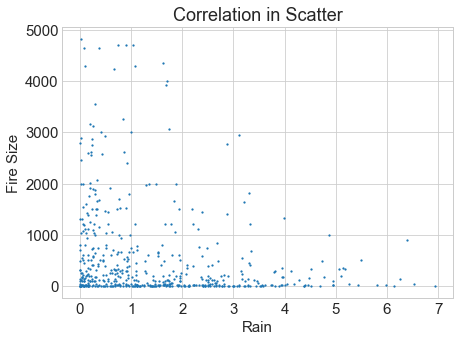

In [15]:
# choose 2 col-names, the function will show their scatter plot
# the threshold=[a,b] is for choosing samples' fire class from a to b
correlation.scatter_corr(df, col1='Rain', col2='Fire Size', threshold=[2,6])

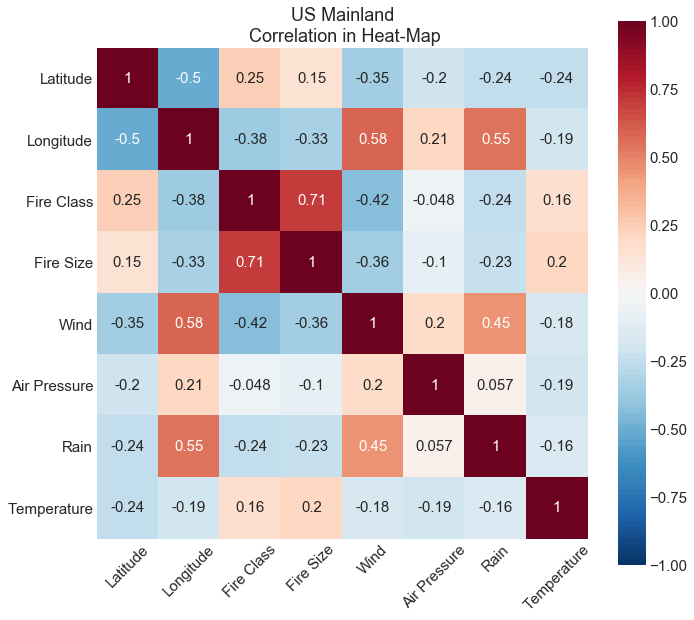

In [17]:
# plot the heat-map of features
# the threshold=[a,b] is for choosing samples' fire class from a to b
heat = correlation.heatmap_corr(df, threshold=[2,6])